# Load Data

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualizations

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#UNIVARIATE ANALYSIS

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

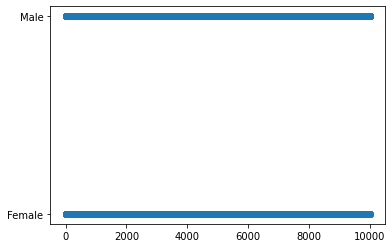

In [10]:
plt.scatter(data.index,data['Gender'])
plt.show()

In [11]:
#BI-VARIATE ANALYSIS

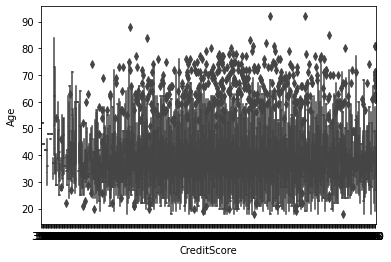

In [12]:
sns.boxplot(x='CreditScore',y='Age',data=data)
plt.show()

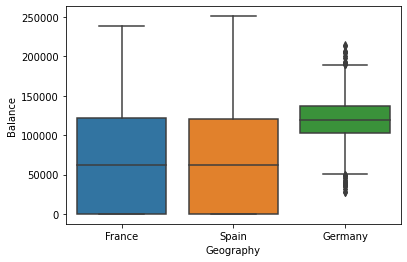

In [13]:
sns.boxplot(x='Geography',y='Balance',data=data)
plt.show()

In [14]:
#MULTI-VARIATE ANALYSIS

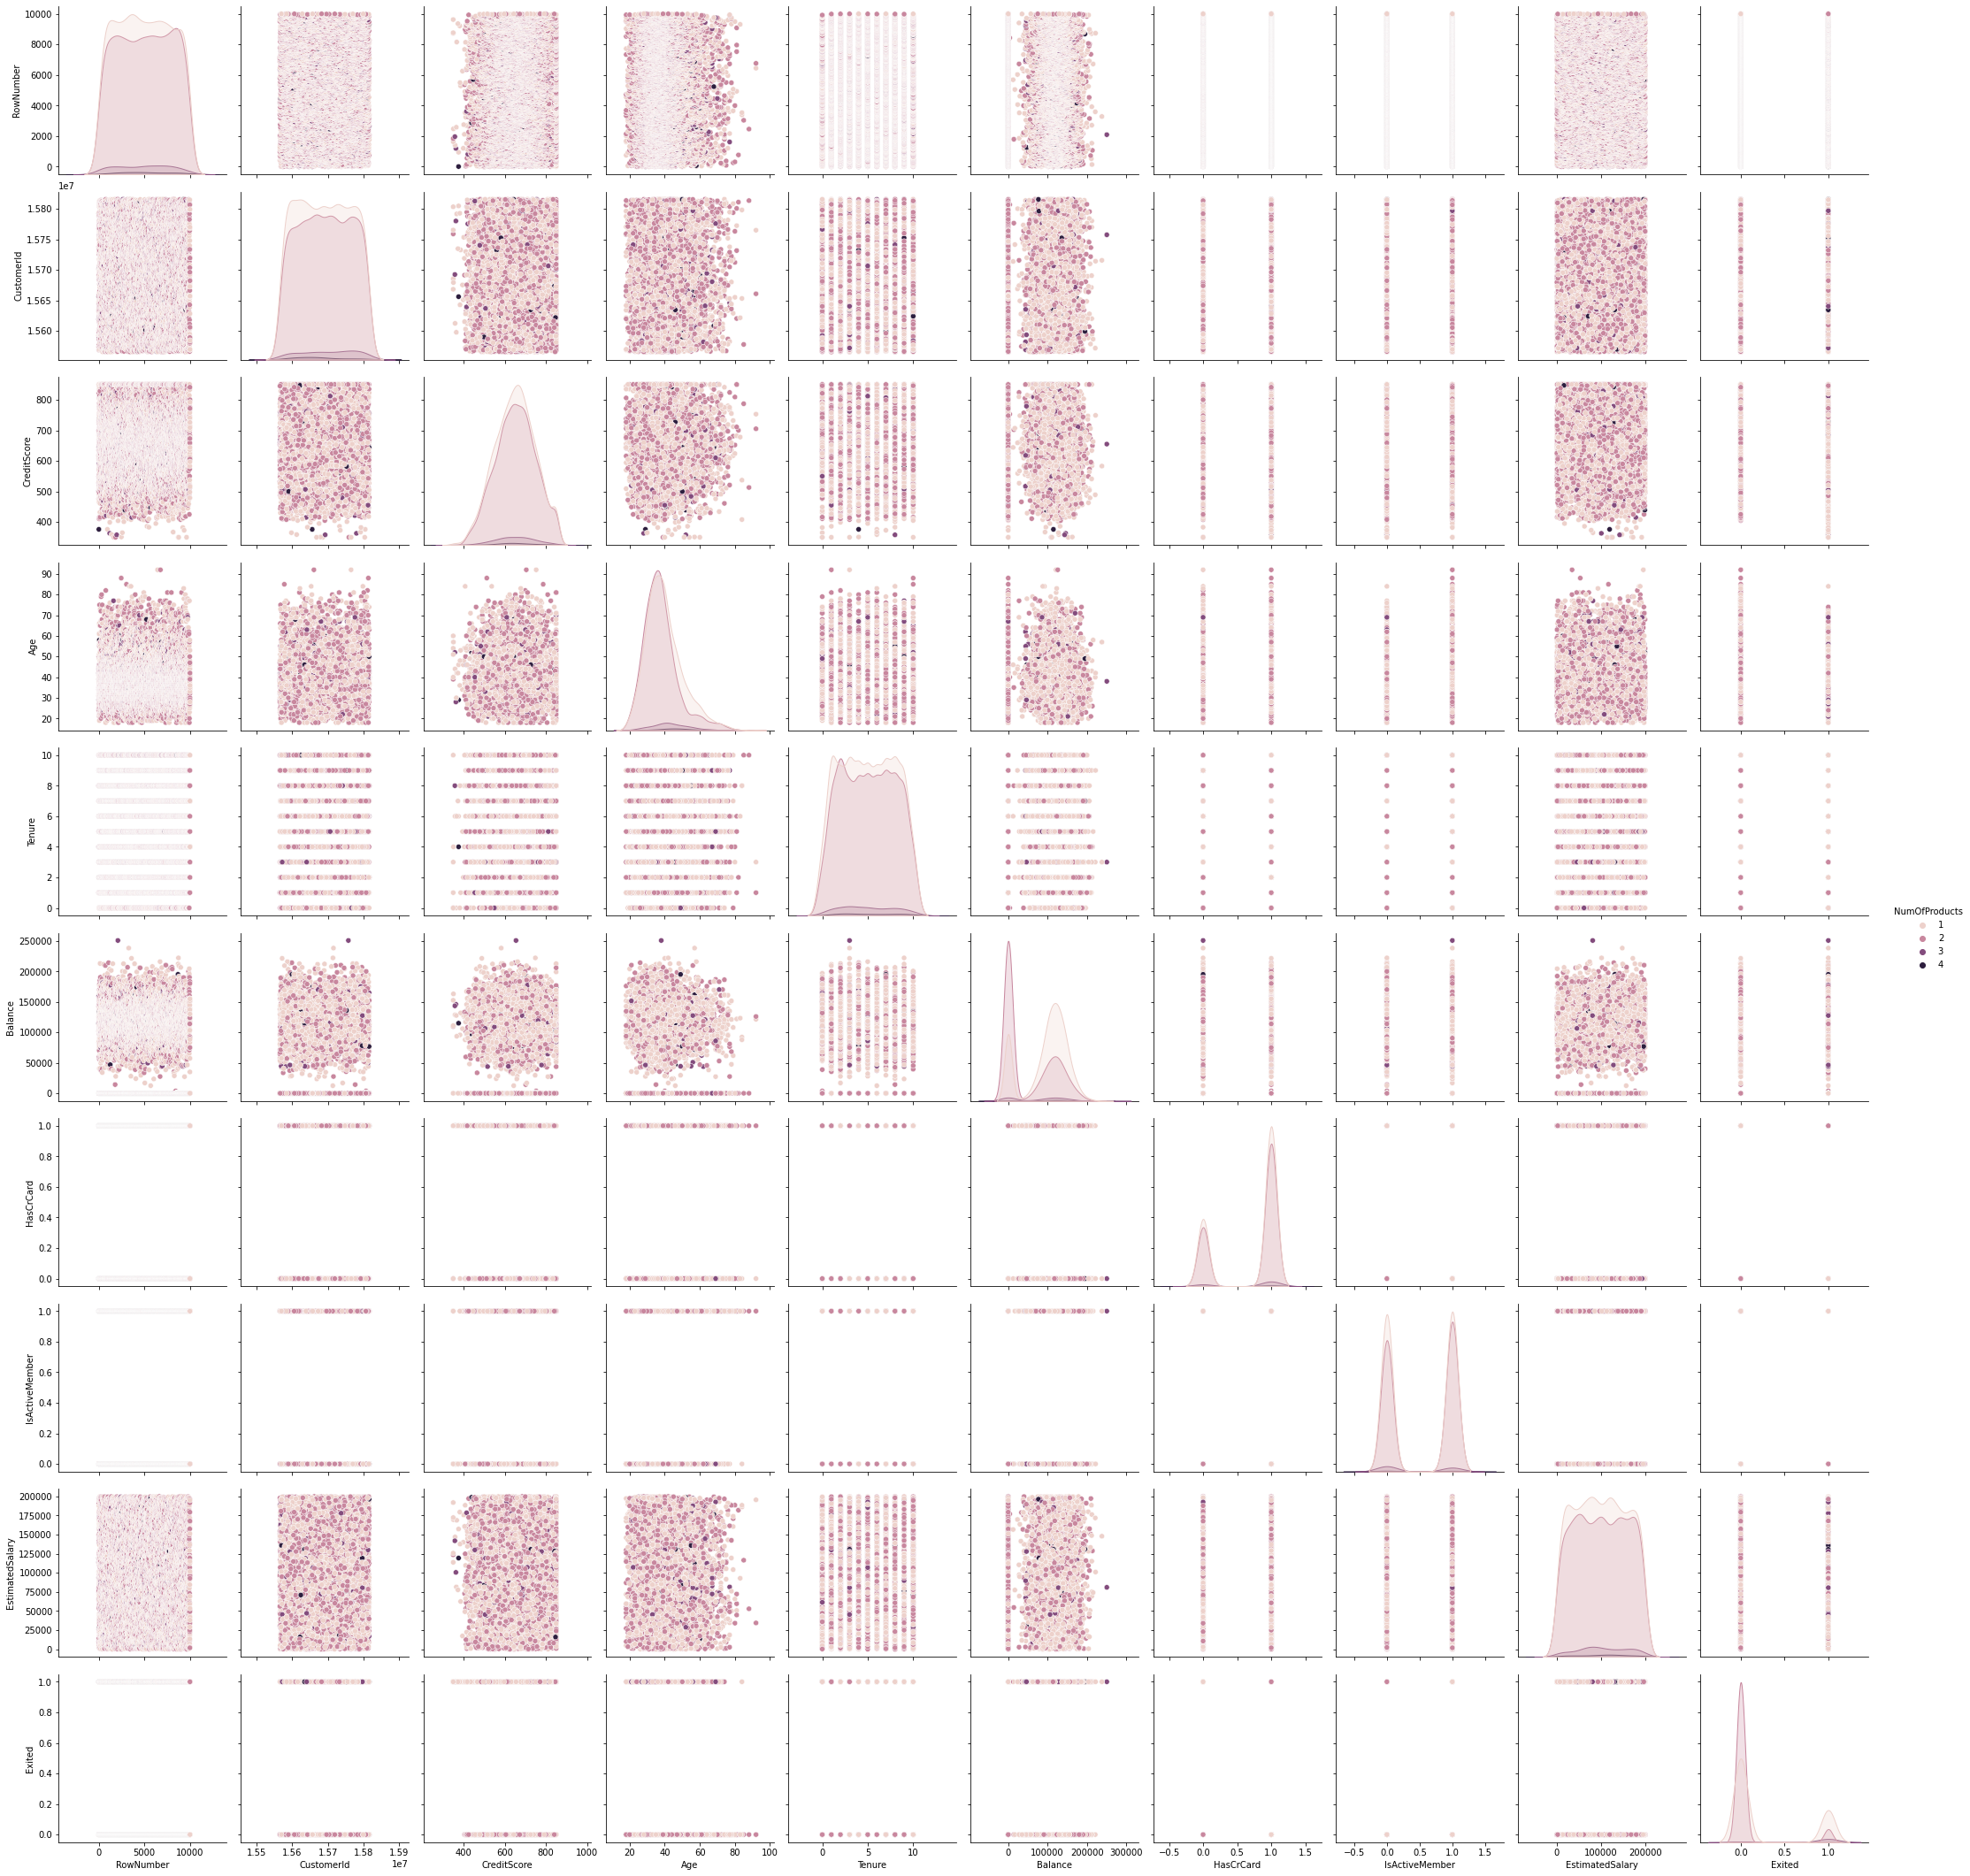

In [15]:
sns.pairplot(data,hue="NumOfProducts",height=3)
plt.show()

# Descriptive Analysis

In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.DataFrame(data)
print (df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [20]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1]) 

Number of numerical variables:  11
Number of categorical variables:  3


# Missing Values

In [22]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
# There are no missing values

# Outliers and Handling Them

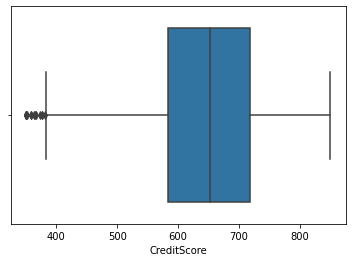

In [24]:
sns.boxplot(x='CreditScore', data=data)

In [25]:
#Removing Outliers based on 'CreditScore' value

Old Shape:  (10000, 14)
New Shape:  (9984, 14)


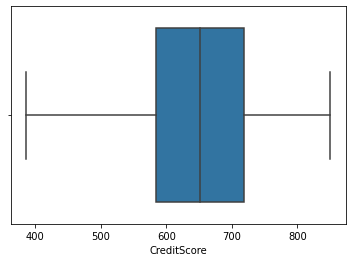

In [26]:
import sklearn
from sklearn.datasets import load_boston 

Q1 = np.percentile(df['CreditScore'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['CreditScore'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
print("Old Shape: ", df.shape) 
upper = np.where(df['CreditScore'] >= (Q3+1.5*IQR)) 
lower = np.where(df['CreditScore'] <= (Q1-1.5*IQR)) 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 
print("New Shape: ", df.shape) 
sns.boxplot(x='CreditScore', data=df)

# Categorical Columns & Encoding Them

In [27]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Cat_vars = list(categorical_data.columns)
Cat_vars

Number of categorical variables:  3


['Surname', 'Geography', 'Gender']

In [28]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [29]:
CleanGeo = {"Geography":{"France": 0, "Germany": 1, "Spain":2}}

In [30]:
data = data.replace(CleanGeo)

In [31]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [32]:
CleanGen = {"Gender": {"Male": 0, "Female": 1}}

In [33]:
data = data.replace(CleanGen)

In [34]:
data.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       1   42   
1             2    15647311       Hill          608          2       1   41   
2             3    15619304       Onio          502          0       1   42   
3             4    15701354       Boni          699          0       1   39   
4             5    15737888   Mitchell          850          2       1   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       0   39   
9996       9997    15569892  Johnstone          516          0       0   35   
9997       9998    15584532        Liu          709          0       1   36   
9998       9999    15682355  Sabbatini          772          1       0   42   
9999      10000    15628319     Walker          792          0       1   28   

      Tenure    Balan

In [35]:
data.drop(columns=['Surname'], inplace=True)

# Dependent and Independent Variables

In [36]:
#Splitting the Dataset into the Independent Feature Matrix:
X = data.iloc[:, :-1].values
print(X)

[[1.0000000e+00 1.5634602e+07 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 1.5647311e+07 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [3.0000000e+00 1.5619304e+07 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [9.9980000e+03 1.5584532e+07 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [9.9990000e+03 1.5682355e+07 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+04 1.5628319e+07 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [37]:
#Extracting the Dataset to Get the Dependent Vector
Y = data.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


# Scale Independent Variables

In [38]:
from sklearn.preprocessing import StandardScaler
 
object= StandardScaler()
 
# standardization 
scale = object.fit_transform(X) 
print(scale)

[[-1.73187761 -0.78321342 -0.32622142 ...  0.64609167  0.97024255
   0.02188649]
 [-1.7315312  -0.60653412 -0.44003595 ... -1.54776799  0.97024255
   0.21653375]
 [-1.73118479 -0.99588476 -1.53679418 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.7315312  -0.11935577  1.25683526 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.73187761 -0.87055909  1.46377078 ...  0.64609167 -1.03067011
  -1.07636976]]


# Train and Test Set Split

In [39]:
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)

In [40]:
X_train

array([[8.0000000e+02, 1.5567367e+07, 6.0100000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.0331574e+05],
       [1.0700000e+03, 1.5628674e+07, 8.4400000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.1904310e+04],
       [8.4110000e+03, 1.5609913e+07, 7.4300000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1343608e+05],
       ...,
       [3.2650000e+03, 1.5574372e+07, 7.3800000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [9.8460000e+03, 1.5664035e+07, 5.9000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [2.7330000e+03, 1.5592816e+07, 6.2300000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

In [41]:
Y_train

array([0, 1, 0, ..., 0, 0, 1])

In [42]:
X_test

array([[9.3950000e+03, 1.5615753e+07, 5.9700000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.9285267e+05],
       [8.9900000e+02, 1.5654700e+07, 5.2300000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.2870210e+05],
       [2.3990000e+03, 1.5633877e+07, 7.0600000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 7.5732250e+04],
       ...,
       [4.9200000e+02, 1.5699005e+07, 7.1000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 9.9838800e+03],
       [2.0220000e+03, 1.5795519e+07, 7.1600000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.9732213e+05],
       [4.3000000e+03, 1.5711991e+07, 6.1500000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 3.1831500e+03]])

In [43]:
Y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,